In [1]:
import random
from collections import deque, namedtuple
from time import sleep
import os
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from IPython import display  
from tqdm import trange, tqdm
import sys
sys.path.append('../')  # 添加上级文件夹到sys.path中
from exp.settings import DEVICE
from exp.model import DQN, QNet512, QNet1024



def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render())
    plt.title(f"Step: {step}")
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf(),info)

def testLander(env, agent, loop=3):
    for i in range(loop):
        state, info = env.reset()
        for idx_step in range(1000):
            action = agent.getAction(state, epsilon=0)
            show_state(env, idx_step, state)
            state, reward, done, _, _ = env.step(action)
            if done:
                break
    env.close()
    
def save_state(env,agent,sample_num=10000):
    state, info = env.reset()
    state_np=np.zeros(shape=(sample_num,8))
    cnt = 0
    for i in tqdm(range(sample_num)):
        action = agent.getAction(state, epsilon=0)
        next_state, reward, done, _, _ = env.step(action)
        state_np[i]=state
        state = next_state
        cnt+=1
        if done or cnt > 300:
            state, info = env.reset()
            cnt=0
    np.save('save/state.npy',state_np)

def testLander_no_visual(env, agent, episodes=100):
    total_reward = 0
    for i in tqdm(range(episodes)):
        state, info = env.reset()
        episode_reward = 0
        cnt=0
        while cnt<1000:
            action = agent.getAction(state, epsilon=0)
            state, reward, done, _, _ = env.step(action)
            episode_reward += reward
            cnt+=1
            if done:
                break
        total_reward += episode_reward
    average_reward = total_reward / episodes
    print(f"Average reward over {episodes} episodes: {average_reward}")
    
def plotScore(scores):
    plt.figure()
    plt.plot(scores)
    plt.title("Score History")
    plt.xlabel("Episodes")
    plt.show()
    
BATCH_SIZE = 128
LR = 1e-4
EPISODES = 5000
TARGET_SCORE = 250.     # early training stop at avg score of last 100 episodes
GAMMA = 0.99            # discount factor
MEMORY_SIZE = 10000     # max memory buffer size
LEARN_STEP = 5          # how often to learn
TAU = 1e-3              # for soft update of target parameters
SAVE_CHKPT = True      # save trained network .pth file
device="cuda:2"

In [2]:
env = gym.make('LunarLander-v2', render_mode="rgb_array")
num_states = env.observation_space.shape[0]
num_actions = env.action_space.n
agent = DQN(
    n_states = num_states,
    n_actions = num_actions,
    batch_size = BATCH_SIZE,
    lr = LR,
    gamma = GAMMA,
    mem_size = MEMORY_SIZE,
    learn_step = LEARN_STEP,
    tau = TAU,
    ckpt= "../save/best-ckpt-mlp1024-260.pth",
    QNet= QNet1024
    )

Loading checkpoint ../save/best-ckpt-mlp1024-260.pth


KeyboardInterrupt: 

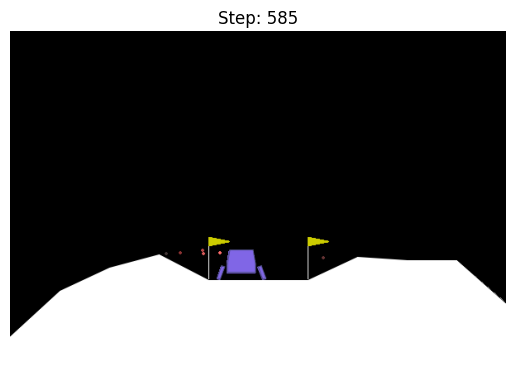

In [3]:
testLander(env, agent)
# testLander_no_visual(env, agent, episodes=100) 

In [3]:
save_state(env,agent,sample_num=10000)

100%|██████████| 10000/10000 [00:07<00:00, 1313.51it/s]
